In [7]:
import joypy
import pandas as pd
from matplotlib import cm

In [2]:
df = pd.read_excel('annual_stats_norm_new_2.xlsx')

In [3]:
df

,year,total_area,duration,extent,intensity,median_period,june,july,august
0,2002,165342,6.2,4429,27404,0.07725,0.00089,0.17163,0.00986
1,2003,184117,7.2,6351,46007,0.08745,0.00000,0.17402,0.03472
2,2004,161062,3.9,6020,23624,0.04704,0.01027,0.05587,0.04648
3,2005,211265,10.1,7710,77664,0.14708,0.00045,0.33178,0.01414
4,2006,264125,8.1,7790,63414,0.12829,0.00188,0.28611,0.01856
5,2007,254394,6.3,6372,40374,0.11921,0.02140,0.11059,0.16140
6,2008,247843,8.2,8840,72829,0.12184,0.00000,0.23830,0.04861
7,2009,218887,5.3,4995,26326,0.06977,0.05361,0.08977,0.02264
8,2010,195087,6.2,6406,39966,0.05712,0.00123,0.13080,0.00670
9,2011,207125,4.3,4655,19873,0.06121,0.00226,0.09783,0.04057


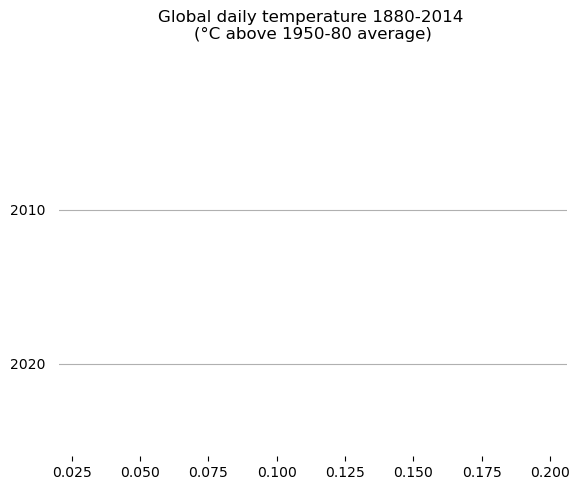

In [8]:
%matplotlib inline

labels=[y if y%10==0 else None for y in list(df.year.unique())]
fig, axes = joypy.joyplot(df, by="year", column="median_period", labels=labels, range_style='own', 
                          grid="y", linewidth=1, legend=False, figsize=(6,5),
                          title="Global daily temperature 1880-2014 \n(°C above 1950-80 average)",
                          colormap=cm.autumn_r)